In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from kmeans_pytorch import kmeans, kmeans_predict

In [2]:
# set random seed
np.random.seed(123)

In [3]:
# data
data_size, dims, num_clusters = 1000, 2, 3
x = np.random.randn(data_size, dims) / 6
x = torch.from_numpy(x)

In [4]:
# set device
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

In [5]:
# k-means
cluster_ids_x, cluster_centers = kmeans(
    X=x, num_clusters=num_clusters, distance='euclidean', device=device
)

running k-means on cuda:0..


[running kmeans]: 6it [00:00, 100.01it/s, center_shift=0.000068, iteration=7, tol=0.000100]

In [6]:
# cluster IDs and cluster centers
print(cluster_ids_x)
print(cluster_centers)

tensor([2, 0, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2, 1, 1,
        2, 0, 1, 2, 2, 1, 2, 0, 1, 1, 2, 1, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2,
        0, 1, 0, 2, 1, 0, 0, 2, 2, 1, 0, 1, 0, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1,
        1, 2, 2, 1, 0, 2, 1, 1, 1, 2, 1, 1, 1, 0, 2, 2, 1, 2, 2, 1, 0, 0, 2, 1,
        1, 0, 0, 0, 1, 1, 1, 0, 2, 1, 0, 2, 1, 2, 0, 0, 1, 0, 2, 2, 2, 1, 1, 1,
        1, 0, 1, 0, 2, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2,
        2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0,
        2, 1, 0, 1, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 0,
        2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 2, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2, 2,
        0, 1, 0, 1, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 1, 1, 1, 2, 1, 0, 2, 0,
        0, 2, 2, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 2, 1,
        1, 0, 1, 2, 1, 2, 0, 2, 2, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 1, 1, 1,
        0, 1, 0, 1, 2, 0, 2, 1, 2, 1, 0,

In [7]:
# more data
y = np.random.randn(5, dims) / 6
y = torch.from_numpy(y)

In [8]:
# predict cluster ids for y
cluster_ids_y = kmeans_predict(
    y, cluster_centers, 'euclidean', device=device
)

predicting on cuda:0..


In [9]:
print(cluster_ids_y)

tensor([1, 2, 0, 1, 2])


[running kmeans]: 7it [00:00, 19.93it/s, center_shift=0.000068, iteration=7, tol=0.000100] 


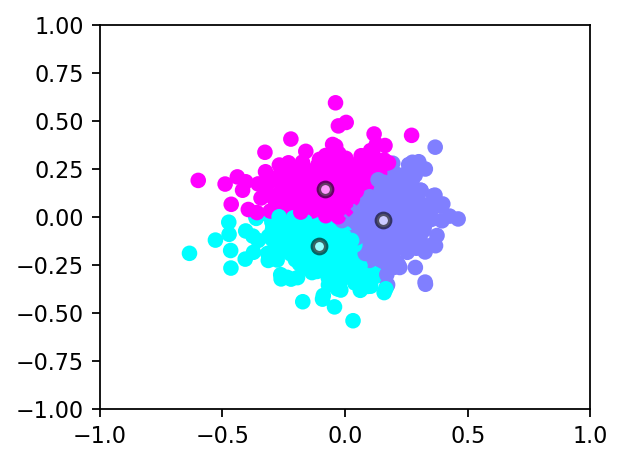

In [10]:
# plot
plt.figure(figsize=(4, 3), dpi=160)
plt.scatter(x[:, 0], x[:, 1], c=cluster_ids_x, cmap='cool')
plt.scatter(y[:, 0], y[:, 1], c=cluster_ids_y, cmap='cool', marker='X')
plt.scatter(
    cluster_centers[:, 0], cluster_centers[:, 1],
    c='white',
    alpha=0.6,
    edgecolors='black',
    linewidths=2
)
plt.axis([-1, 1, -1, 1])
plt.tight_layout()
plt.show()